### ***`Flipkart Laptop Data - Business Insights on Product Pricing`***

**Importing Libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
import warnings 
warnings.filterwarnings('ignore')

***Load the data***

In [2]:
df = pd.read_csv(r"C:\Users\mythi\Downloads\laptop_details.csv")

In [3]:
df

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


**DATA CLEANING:**

In [5]:
print(df['Feature'][0])

print(df['Feature'][6])

Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty
Processor: Intel i3-1115G4 (Base- 1.70 GHz & Turbo up to 4.10 GHz) 2 CoresRAM & Storage: 8GB DDR4 & 1TB + 256GB SSDGraphics & Keyboard: Integrated & Standard KeyboardDisplay: 15.6" FHD WVA AG Narrow BorderPorts: 2x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, SD Card reader, Audio jack, 1 M.2 2230/2280 slot for solid-state drive/Intel OptaneIntel Core i3 Processor (11th Gen)8 GB DDR4 RAMWindows 11 Operating System1 TB HDD|256 GB SSD39.62 cm (15.6 inch) Display1 YEAR


***Seperating Processor from Feature***

In [6]:
regex = '(?:AMD|Intel|M1|Qualcomm|Apple)+[\w\s\d]+Processor'
df['Processor'] = df['Feature'].apply(lambda x : re.findall(regex, x))
df["Processor"] = df["Processor"].apply(lambda x: ''.join(x))

In [7]:
df.head()

,Product,Rating,MRP,Feature,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor


In [8]:
df.Processor.value_counts()

Intel Core i5 Processor                               157
Intel Core i3 Processor                               133
AMD Ryzen 9 Octa Core Processor                        87
AMD Ryzen 7 Octa Core Processor                        80
Intel Core i7 Processor                                56
AMD Ryzen 5 Hexa Core Processor                        52
AMD Ryzen 3 Dual Core Processor                        43
AMD Ryzen 5 Quad Core Processor                        37
Intel Celeron Dual Core Processor                      20
Intel Core i9 Processor                                11
Apple M1 Processor                                      7
Apple M1 Pro Processor                                  6
Apple M2 Processor                                      5
AMD Ryzen 3 Quad Core Processor                         4
Intel Celeron Quad Core Processor                       3
Intel Pentium Silver Processor                          3
Intel Pentium Quad Core Processor                       3
Intel Evo Core

***Removing Null values in Rating column***

In [9]:
df.Rating.isnull().sum()

139

In [10]:
df.Rating.median()

4.3

In [11]:
df['Rating'].fillna(df['Rating'].median(),inplace=True)

In [12]:
df.Rating.isnull().sum()

0

***Getting seperate Ram column from Feature***

In [13]:
temp = df['Feature'][100]

regex = r'\d+\sGB[\s\w]+RAM'

fun = lambda x : re.findall(regex, x)

print(fun(temp))

['8 GB DDR4 RAM']


In [14]:
regex = r'\d+\sGB[\s\w]+RAM'

df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex, x))
df["RAM"] = df["RAM"].apply(lambda x: ''.join(x))

In [15]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM


***Separating OS column***

In [16]:
df["OS"] = df['Feature'].apply(lambda x: re.search("RAM[\sA-Za-z0-9]+Operating System",x).group())
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,RAM64 bit Windows 11 Operating System
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,RAM64 bit Windows 11 Operating System
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,RAM64 bit Windows 11 Operating System
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,RAM64 bit Windows 10 Operating System
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,RAMWindows 11 Operating System


In [17]:
df["OS"] = df["OS"].str.replace("Operating System", " ")
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,RAM64 bit Windows 11
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,RAM64 bit Windows 11
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,RAM64 bit Windows 11
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,RAM64 bit Windows 10
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,RAMWindows 11


In [18]:
df["OS"] = df['OS'].apply(lambda x: x.split("RAM")[1])
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11


In [19]:
df.OS.value_counts()

64 bit Windows 11      404
Windows 11             156
64 bit Windows 10      117
Mac OS                  19
Windows 10              12
Chrome                   6
DOS                      2
64 bit DOS               2
32 bit Windows 11        1
64 bit Chrome            1
Name: OS, dtype: int64

***Obtaining Storage column from Feature***

In [20]:
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'
df['Storage'] = df['Feature'].apply(lambda x : re.findall(regex, x))
df["Storage"] = df["Storage"].apply(lambda x: ''.join(x))

In [21]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11,512 GB SSD


In [22]:
df['Storage'].value_counts()

512 GB SSD                      375
1 TB SSD                        176
256 GB SSD                       98
1 TB HDD256 GB SSD               26
1 TB HDD                         17
                                 10
2 TB SSD                          7
128 GB SSD                        6
1 TB HDD512 GB SSD                2
128 GB SSD1 TB HDD128 GB SSD      2
256 GB HDD256 GB SSD              1
Name: Storage, dtype: int64

In [23]:
df["Storage"].replace("", np.nan, inplace = True)
df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11,512 GB SSD
...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome,NaN
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,4.3,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,64 bit Windows 11,1 TB SSD
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,64 bit Windows 11,512 GB SSD


In [24]:
df.Storage.value_counts()

512 GB SSD                      375
1 TB SSD                        176
256 GB SSD                       98
1 TB HDD256 GB SSD               26
1 TB HDD                         17
2 TB SSD                          7
128 GB SSD                        6
1 TB HDD512 GB SSD                2
128 GB SSD1 TB HDD128 GB SSD      2
256 GB HDD256 GB SSD              1
Name: Storage, dtype: int64

In [25]:
df.Storage.mode()

0    512 GB SSD
Name: Storage, dtype: object

In [26]:
df["Storage"]= df["Storage"].replace(np.nan, "512 GB")
df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11,512 GB SSD
...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome,512 GB
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,4.3,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,64 bit Windows 11,1 TB SSD
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,64 bit Windows 11,512 GB SSD


In [27]:
df.Storage.value_counts()

512 GB SSD                      375
1 TB SSD                        176
256 GB SSD                       98
1 TB HDD256 GB SSD               26
1 TB HDD                         17
512 GB                           10
2 TB SSD                          7
128 GB SSD                        6
1 TB HDD512 GB SSD                2
128 GB SSD1 TB HDD128 GB SSD      2
256 GB HDD256 GB SSD              1
Name: Storage, dtype: int64

***Separating SSD in storage***

In [28]:
df['Disk_Drive'] = df['Storage'].apply(lambda x : re.findall('[0-9]+\s(?:GB|TB|)\sSSD', x))
df["Disk_Drive"] = df["Disk_Drive"].apply(lambda x: ''.join(x))
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Disk_Drive
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512 GB SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD,512 GB SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11,512 GB SSD,512 GB SSD


In [29]:
df.Disk_Drive.value_counts()

512 GB SSD              377
1 TB SSD                176
256 GB SSD              125
                         27
2 TB SSD                  7
128 GB SSD                6
128 GB SSD128 GB SSD      2
Name: Disk_Drive, dtype: int64

In [30]:
df['Disk_Drive'] = df['Disk_Drive'].apply(lambda x:x.split('SSD')[0])
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Disk_Drive
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD,256 GB
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512 GB
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512 GB
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD,512 GB
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11,512 GB SSD,512 GB


In [31]:
df.Disk_Drive.value_counts()

512 GB     377
1 TB       176
256 GB     125
            27
128 GB       8
2 TB         7
Name: Disk_Drive, dtype: int64

In [32]:
df["Disk_Drive"].replace("", np.nan, inplace = True)
df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Disk_Drive
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD,256 GB
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512 GB
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512 GB
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD,512 GB
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11,512 GB SSD,512 GB
...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome,512 GB,NaN
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512 GB
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,4.3,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,64 bit Windows 11,1 TB SSD,1 TB
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,64 bit Windows 11,512 GB SSD,512 GB


In [33]:
df.Disk_Drive.mode()

0    512 GB 
Name: Disk_Drive, dtype: object

In [34]:
df["Disk_Drive"]= df["Disk_Drive"].replace(np.nan, "512 GB")
df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Disk_Drive
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD,256 GB
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512 GB
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512 GB
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD,512 GB
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11,512 GB SSD,512 GB
...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome,512 GB,512 GB
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512 GB
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,4.3,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,64 bit Windows 11,1 TB SSD,1 TB
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,64 bit Windows 11,512 GB SSD,512 GB


***Converting TB into GB***

In [35]:
df['Disk_Drive'] = df['Disk_Drive'].apply(lambda x:re.sub('(?:1 TB)','1000 GB',str(x)))
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Disk_Drive
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD,256 GB
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512 GB
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512 GB
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD,512 GB
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11,512 GB SSD,512 GB


In [36]:
df['Disk_Drive'] = df['Disk_Drive'].apply(lambda x:re.sub('(?:2 TB)','2000 GB',str(x)))
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Disk_Drive
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD,256 GB
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512 GB
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512 GB
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD,512 GB
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11,512 GB SSD,512 GB


In [37]:
df.Disk_Drive.value_counts()

512 GB      377
1000 GB     176
256 GB      125
512 GB       27
128 GB        8
2000 GB       7
Name: Disk_Drive, dtype: int64

In [38]:
df.rename(columns = {'Disk_Drive':'Disk_Drive(SSD_GB)'}, inplace = True)
df['Disk_Drive(SSD_GB)'] = df['Disk_Drive(SSD_GB)'].str.replace("GB", " ")
df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Disk_Drive(SSD_GB)
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD,256
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD,512
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11,512 GB SSD,512
...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome,512 GB,512
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,4.3,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,64 bit Windows 11,1 TB SSD,1000
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,64 bit Windows 11,512 GB SSD,512


***Seperating Brand from Product***

In [39]:
regex = r'^\w+'
df['Brand'] = df['Product'].apply(lambda x : re.findall(regex, x))
df["Brand"] = df["Brand"].apply(lambda x: ''.join(x))
df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Disk_Drive(SSD_GB),Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD,256,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD,512,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11,512 GB SSD,512,ASUS
...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome,512 GB,512,ASUS
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,Lenovo
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,4.3,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,64 bit Windows 11,1 TB SSD,1000,ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,64 bit Windows 11,512 GB SSD,512,ASUS


In [40]:
df.MRP = df.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Disk_Drive(SSD_GB),Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD,256,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD,512,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11,512 GB SSD,512,ASUS


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             720 non-null    object 
 1   Rating              720 non-null    float64
 2   MRP                 720 non-null    float64
 3   Feature             720 non-null    object 
 4   Processor           720 non-null    object 
 5   RAM                 720 non-null    object 
 6   OS                  720 non-null    object 
 7   Storage             720 non-null    object 
 8   Disk_Drive(SSD_GB)  720 non-null    object 
 9   Brand               720 non-null    object 
dtypes: float64(2), object(8)
memory usage: 56.4+ KB


In [42]:
df.RAM.unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified Memory RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified Memory RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM',
       '32 GB Unified Memory RAM', '16 GB LPDDR4 RAM', '32 GB DDR5 RAM',
       '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM',
       '8 GB DDR5 RAM', '32 GB DDR4 RAM', '32 GB LPDDR4X RAM',
       '16 GB LPDDR3 RAM'], dtype=object)

***Seperating RAM Type from RAM column***

In [43]:
regex = r'(?:DDR4|LPDDR4|LPDDR4X|Unified Memory|DDR5|LPDDR3|LPDDR5)[\s\w]'
df['RAM_Type'] = df['RAM'].apply(lambda x : re.findall(regex, x))
df.RAM_Type = df.RAM_Type.apply(lambda x : ''.join(x))
df.head(4)

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Disk_Drive(SSD_GB),Brand,RAM_Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD,256,Lenovo,DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,Lenovo,DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,ASUS,DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD,512,HP,DDR4


***Getting RAM GB column***

In [44]:
df['RAM_GB'] = df['RAM'].apply(lambda x : re.findall('^[\d]+', x))
df.RAM_GB = df.RAM_GB.apply(lambda x : ''.join(x))
df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Disk_Drive(SSD_GB),Brand,RAM_Type,RAM_GB
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD,256,Lenovo,DDR4,8
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,Lenovo,DDR4,8
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,ASUS,DDR4,8
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD,512,HP,DDR4,8
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11,512 GB SSD,512,ASUS,DDR4,8
...,...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome,512 GB,512,ASUS,LPDDR4,4
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,Lenovo,DDR4,8
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,4.3,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,64 bit Windows 11,1 TB SSD,1000,ASUS,DDR5,16
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,64 bit Windows 11,512 GB SSD,512,ASUS,LPDDR5,16


***Renaming MRP as Price column***

In [45]:
df.rename(columns = {'MRP':'Price'}, inplace = True)
df.head()

,Product,Rating,Price,Feature,Processor,RAM,OS,Storage,Disk_Drive(SSD_GB),Brand,RAM_Type,RAM_GB
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD,256,Lenovo,DDR4,8
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,Lenovo,DDR4,8
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,ASUS,DDR4,8
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD,512,HP,DDR4,8
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11,512 GB SSD,512,ASUS,DDR4,8


***Obtaining Inches for Laptop***

In [46]:
df['Inches'] = df['Feature'].apply(lambda x:re.findall('\s\([0-9]+.[0-9]+\s[A-Za-z]+\)\s',x))
df['Inches']= df['Inches'].apply(lambda x : ''.join(x))
df.head(4)

,Product,Rating,Price,Feature,Processor,RAM,OS,Storage,Disk_Drive(SSD_GB),Brand,RAM_Type,RAM_GB,Inches
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD,256,Lenovo,DDR4,8,
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,Lenovo,DDR4,8,(15.6 inch)
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,ASUS,DDR4,8,(15.6 inch)
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD,512,HP,DDR4,8,(15.6 inch)


In [47]:
df.Inches.value_counts()

 (15.6 inch)       356
                   160
 (15.6 Inch)       131
 (13.3 inch)         9
 (13.3 Inch)         9
 (17.3 Inch)         6
 (11.6 Inch)         5
 (13.4 Inch)         5
 (15.6 inches)       5
 (17.3 inch)         5
 (16.2 inch)         5
 (16.1 inch)         5
 (14.1 inch)         4
 (11.6 inch)         4
 (13.6 Inch)         3
 (16.1 Inch)         3
 (14.2 inch)         2
 (14.96 Inch)        1
 (13.5 inch)         1
 (16.6 inch)         1
Name: Inches, dtype: int64

In [48]:
df["Inches"]= df['Inches'].str.replace("(", " ")
df["Inches"]= df['Inches'].str.replace("Inch", " ")
df["Inches"]= df['Inches'].str.replace(")", " ")
df["Inches"]= df['Inches'].str.replace("inches", " ")
df["Inches"]= df['Inches'].str.replace("inch", " ")
df.head()

,Product,Rating,Price,Feature,Processor,RAM,OS,Storage,Disk_Drive(SSD_GB),Brand,RAM_Type,RAM_GB,Inches
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD,256,Lenovo,DDR4,8,
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,Lenovo,DDR4,8,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,ASUS,DDR4,8,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD,512,HP,DDR4,8,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11,512 GB SSD,512,ASUS,DDR4,8,15.6


In [49]:
df.Inches.value_counts()

  15.6         492
               160
  13.3          18
  17.3          11
  11.6           9
  16.1           8
  16.2           5
  13.4           5
  14.1           4
  13.6           3
  14.2           2
  14.96          1
  13.5           1
  16.6           1
Name: Inches, dtype: int64

In [50]:
df["Inches"].replace("", np.nan, inplace = True)

In [51]:
df.Inches.median()

15.6

In [52]:
df["Inches"]= df['Inches'].replace(np.nan,"15.6")
df.head()

,Product,Rating,Price,Feature,Processor,RAM,OS,Storage,Disk_Drive(SSD_GB),Brand,RAM_Type,RAM_GB,Inches
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,256 GB SSD,256,Lenovo,DDR4,8,15.6
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,Lenovo,DDR4,8,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11,512 GB SSD,512,ASUS,DDR4,8,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10,512 GB SSD,512,HP,DDR4,8,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11,512 GB SSD,512,ASUS,DDR4,8,15.6


In [53]:
df["OS"] =  df["OS"].str.replace("64 bit", " ")
df["OS"] =  df["OS"].str.replace("32 bit", " ")

***Dropping unwanted columns***

In [54]:
data=df.drop(['Storage','Feature','Product','RAM'],axis=1)
data

,Rating,Price,Processor,OS,Disk_Drive(SSD_GB),Brand,RAM_Type,RAM_GB,Inches
0,4.2,36990.0,Intel Core i3 Processor,Windows 11,256,Lenovo,DDR4,8,15.6
1,4.2,39990.0,Intel Core i3 Processor,Windows 11,512,Lenovo,DDR4,8,15.6
2,4.3,32990.0,Intel Core i3 Processor,Windows 11,512,ASUS,DDR4,8,15.6
3,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor,Windows 10,512,HP,DDR4,8,15.6
4,4.4,49990.0,Intel Core i5 Processor,Windows 11,512,ASUS,DDR4,8,15.6
...,...,...,...,...,...,...,...,...,...
715,4.0,23490.0,Intel Celeron Dual Core Processor,Chrome,512,ASUS,LPDDR4,4,11.6
716,4.5,73490.0,AMD Ryzen 7 Octa Core Processor,Windows 11,512,Lenovo,DDR4,8,15.6
717,4.3,194990.0,AMD Ryzen 9 Octa Core Processor,Windows 11,1000,ASUS,DDR5,16,15.6
718,3.0,125990.0,Intel Core i7 Processor,Windows 11,512,ASUS,LPDDR5,16,15.6


***Converting required columns into int|float***

In [55]:
data['RAM_GB']=data['RAM_GB'].astype(int)

In [56]:
data['Disk_Drive(SSD_GB)']=data['Disk_Drive(SSD_GB)'].astype(int)

In [57]:
data['Inches']=data['Inches'].astype(float)

***Checking info of each column***

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              720 non-null    float64
 1   Price               720 non-null    float64
 2   Processor           720 non-null    object 
 3   OS                  720 non-null    object 
 4   Disk_Drive(SSD_GB)  720 non-null    int32  
 5   Brand               720 non-null    object 
 6   RAM_Type            720 non-null    object 
 7   RAM_GB              720 non-null    int32  
 8   Inches              720 non-null    float64
dtypes: float64(3), int32(2), object(4)
memory usage: 45.1+ KB


***Converting to csv:***

In [59]:
data.to_csv("Laptop.csv")

### ***`DATA VISUALIZATION:`***

**Brand Count plot:**

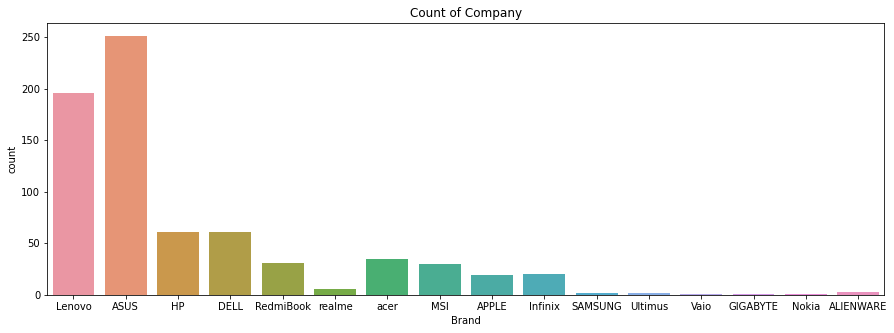

In [60]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['Brand'])
plt.title("Count of Company")
plt.show()

`Observation:`Laptop with Nokia,Vaio,Gigabyte,Ultimus,Samsung,Alienware are least purchased count in flipkart data.

**Processor Count plot:**

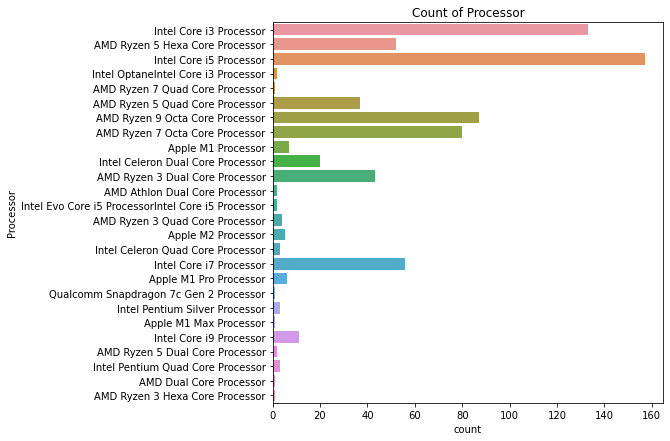

In [61]:
plt.figure(figsize=(7,7))
sns.countplot(y=data['Processor'])
plt.title("Count of Processor")
plt.show()

`Observation:`Count of Processor with intel corei3,i5 are highly purchased.

**(Price vs Brand)Barplot:**

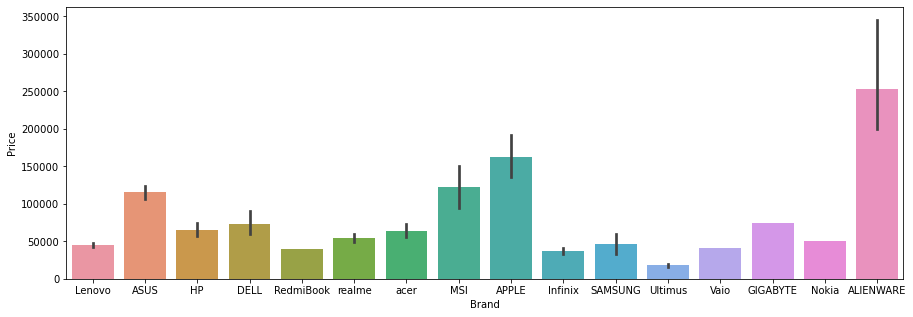

In [62]:
plt.figure(figsize=(15,5))
sns.barplot(y='Price',x='Brand',data=data)
plt.show()

`Observation:`Average price of each brand.

**Price Distribution plot:**

<Figure size 936x360 with 0 Axes>

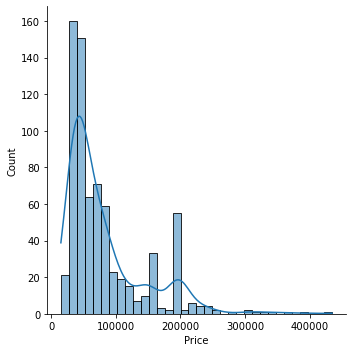

In [63]:
plt.figure(figsize=(13,5))
sns.displot(x='Price',data=data,kde=True)
plt.show()

`Observation:`Distribution of target column.

**(Processor vs Price)Barplot:** 

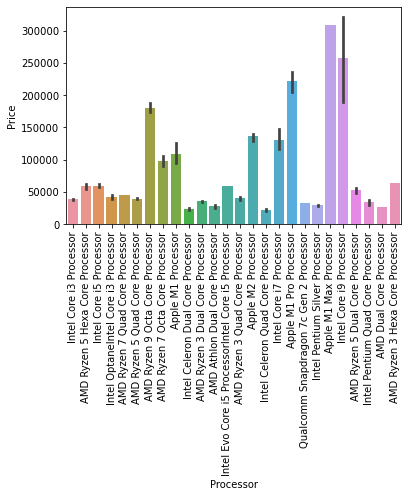

In [64]:
sns.barplot(x=data['Processor'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

`Observation:` It is observed that processor i9, then Ryzen 9 Octa are high. Hence price will depend on the preprocessor.

### ***`ML Problem Statement:`***
      
        The laptop features like RAM Size, RAM Type, HDD, OS, etc. and get the price prediction of Flipkart dataset.

In [65]:
Data=pd.read_csv("Laptop.csv")
Data

,Unnamed: 0,Rating,Price,Processor,OS,Disk_Drive(SSD_GB),Brand,RAM_Type,RAM_GB,Inches
0,0,4.2,36990.0,Intel Core i3 Processor,Windows 11,256,Lenovo,DDR4,8,15.6
1,1,4.2,39990.0,Intel Core i3 Processor,Windows 11,512,Lenovo,DDR4,8,15.6
2,2,4.3,32990.0,Intel Core i3 Processor,Windows 11,512,ASUS,DDR4,8,15.6
3,3,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor,Windows 10,512,HP,DDR4,8,15.6
4,4,4.4,49990.0,Intel Core i5 Processor,Windows 11,512,ASUS,DDR4,8,15.6
...,...,...,...,...,...,...,...,...,...,...
715,715,4.0,23490.0,Intel Celeron Dual Core Processor,Chrome,512,ASUS,LPDDR4,4,11.6
716,716,4.5,73490.0,AMD Ryzen 7 Octa Core Processor,Windows 11,512,Lenovo,DDR4,8,15.6
717,717,4.3,194990.0,AMD Ryzen 9 Octa Core Processor,Windows 11,1000,ASUS,DDR5,16,15.6
718,718,3.0,125990.0,Intel Core i7 Processor,Windows 11,512,ASUS,LPDDR5,16,15.6


In [66]:
Data.drop('Unnamed: 0',axis=1,inplace=True)
Data

,Rating,Price,Processor,OS,Disk_Drive(SSD_GB),Brand,RAM_Type,RAM_GB,Inches
0,4.2,36990.0,Intel Core i3 Processor,Windows 11,256,Lenovo,DDR4,8,15.6
1,4.2,39990.0,Intel Core i3 Processor,Windows 11,512,Lenovo,DDR4,8,15.6
2,4.3,32990.0,Intel Core i3 Processor,Windows 11,512,ASUS,DDR4,8,15.6
3,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor,Windows 10,512,HP,DDR4,8,15.6
4,4.4,49990.0,Intel Core i5 Processor,Windows 11,512,ASUS,DDR4,8,15.6
...,...,...,...,...,...,...,...,...,...
715,4.0,23490.0,Intel Celeron Dual Core Processor,Chrome,512,ASUS,LPDDR4,4,11.6
716,4.5,73490.0,AMD Ryzen 7 Octa Core Processor,Windows 11,512,Lenovo,DDR4,8,15.6
717,4.3,194990.0,AMD Ryzen 9 Octa Core Processor,Windows 11,1000,ASUS,DDR5,16,15.6
718,3.0,125990.0,Intel Core i7 Processor,Windows 11,512,ASUS,LPDDR5,16,15.6


In [67]:
Data.columns

Index(['Rating', 'Price', 'Processor', 'OS', 'Disk_Drive(SSD_GB)', 'Brand',
       'RAM_Type', 'RAM_GB', 'Inches'],
      dtype='object')

***Identify the Target Variable and Splitting the Data into Train and Test***

Type-`Supervised`

Task-`Reggression`

Target Variable-`Price`

In [68]:
y=Data[['Price']]
X=Data[['Rating', 'Processor', 'OS', 'Disk_Drive(SSD_GB)', 'Brand',
       'RAM_Type', 'RAM_GB', 'Inches']]

In [69]:
X

,Rating,Processor,OS,Disk_Drive(SSD_GB),Brand,RAM_Type,RAM_GB,Inches
0,4.2,Intel Core i3 Processor,Windows 11,256,Lenovo,DDR4,8,15.6
1,4.2,Intel Core i3 Processor,Windows 11,512,Lenovo,DDR4,8,15.6
2,4.3,Intel Core i3 Processor,Windows 11,512,ASUS,DDR4,8,15.6
3,4.4,AMD Ryzen 5 Hexa Core Processor,Windows 10,512,HP,DDR4,8,15.6
4,4.4,Intel Core i5 Processor,Windows 11,512,ASUS,DDR4,8,15.6
...,...,...,...,...,...,...,...,...
715,4.0,Intel Celeron Dual Core Processor,Chrome,512,ASUS,LPDDR4,4,11.6
716,4.5,AMD Ryzen 7 Octa Core Processor,Windows 11,512,Lenovo,DDR4,8,15.6
717,4.3,AMD Ryzen 9 Octa Core Processor,Windows 11,1000,ASUS,DDR5,16,15.6
718,3.0,Intel Core i7 Processor,Windows 11,512,ASUS,LPDDR5,16,15.6


In [70]:
y

,Price
0,36990.0
1,39990.0
2,32990.0
3,49990.0
4,49990.0
...,...
715,23490.0
716,73490.0
717,194990.0
718,125990.0


***Split into train and test***

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=1)

In [72]:
X_train

,Rating,Processor,OS,Disk_Drive(SSD_GB),Brand,RAM_Type,RAM_GB,Inches
262,4.3,Intel Core i5 Processor,Windows 10,512,Lenovo,DDR4,8,15.6
388,4.1,Intel Core i5 Processor,Windows 10,256,acer,DDR4,8,15.6
352,4.3,Intel Core i7 Processor,Windows 11,1000,MSI,DDR5,16,15.6
366,4.1,Intel Core i5 Processor,Windows 11,512,RedmiBook,DDR4,8,15.6
259,4.4,Intel Core i5 Processor,Windows 11,512,DELL,DDR4,8,15.6
...,...,...,...,...,...,...,...,...
645,4.7,AMD Ryzen 5 Hexa Core Processor,Windows 11,512,DELL,DDR4,8,15.6
715,4.0,Intel Celeron Dual Core Processor,Chrome,512,ASUS,LPDDR4,4,11.6
72,4.2,Intel Celeron Quad Core Processor,Windows 11,256,Infinix,LPDDR4X,8,15.6
235,4.1,Intel Pentium Silver Processor,Windows 11,256,ASUS,DDR4,8,15.6


In [73]:
y_train

,Price
262,58000.0
388,60130.0
352,200000.0
366,39990.0
259,67990.0
...,...
645,71990.0
715,23490.0
72,22990.0
235,27990.0


In [74]:
y_train=y_train.squeeze()

In [75]:
y_test=y_test.squeeze()

In [76]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(540, 8) (540,)
(180, 8) (180,)


 ***Separating Categorical and Numerical Columns:*** 

In [77]:
X_train.dtypes

Rating                float64
Processor              object
OS                     object
Disk_Drive(SSD_GB)      int64
Brand                  object
RAM_Type               object
RAM_GB                  int64
Inches                float64
dtype: object

In [78]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,Processor,OS,Brand,RAM_Type
262,Intel Core i5 Processor,Windows 10,Lenovo,DDR4
388,Intel Core i5 Processor,Windows 10,acer,DDR4
352,Intel Core i7 Processor,Windows 11,MSI,DDR5
366,Intel Core i5 Processor,Windows 11,RedmiBook,DDR4
259,Intel Core i5 Processor,Windows 11,DELL,DDR4


In [79]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,Rating,Disk_Drive(SSD_GB),RAM_GB,Inches
262,4.3,512,8,15.6
388,4.1,256,8,15.6
352,4.3,1000,16,15.6
366,4.1,512,8,15.6
259,4.4,512,8,15.6


**Scaling the numerical features**

In [80]:
X_train_num.head()

,Rating,Disk_Drive(SSD_GB),RAM_GB,Inches
262,4.3,512,8,15.6
388,4.1,256,8,15.6
352,4.3,1000,16,15.6
366,4.1,512,8,15.6
259,4.4,512,8,15.6


In [81]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)
X_train_num_rescaled.head()

,Rating,Disk_Drive(SSD_GB),RAM_GB,Inches
262,-0.030957,-0.246782,-0.456745,0.149435
388,-0.826988,-1.136866,-0.456745,0.149435
352,-0.030957,1.449940,0.659284,0.149435
366,-0.826988,-0.246782,-0.456745,0.149435
259,0.367059,-0.246782,-0.456745,0.149435


In [82]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 4
Mean of each column: [  4.30777778 582.97777778  11.27407407  15.50622222]
Std of each column: [2.51246276e-01 2.87613358e+02 7.16827334e+00 6.27547686e-01]


In [83]:
X_train_num.describe()

,Rating,Disk_Drive(SSD_GB),RAM_GB,Inches
count,540.000000,540.000000,540.000000,540.000000
mean,4.307778,582.977778,11.274074,15.506222
std,0.251479,287.880038,7.174920,0.628130
min,3.000000,128.000000,4.000000,11.600000
25%,4.200000,512.000000,8.000000,15.600000
50%,4.300000,512.000000,8.000000,15.600000
75%,4.400000,512.000000,16.000000,15.600000
max,5.000000,2000.000000,128.000000,17.300000


**One Hot encoding for categorical columns**

In [84]:
X_train_cat.head()

,Processor,OS,Brand,RAM_Type
262,Intel Core i5 Processor,Windows 10,Lenovo,DDR4
388,Intel Core i5 Processor,Windows 10,acer,DDR4
352,Intel Core i7 Processor,Windows 11,MSI,DDR5
366,Intel Core i5 Processor,Windows 11,RedmiBook,DDR4
259,Intel Core i5 Processor,Windows 11,DELL,DDR4


In [85]:
X_train_cat['Brand'].value_counts(normalize=True)

ASUS         0.320370
Lenovo       0.277778
HP           0.100000
DELL         0.077778
acer         0.053704
RedmiBook    0.044444
MSI          0.040741
APPLE        0.029630
Infinix      0.027778
realme       0.009259
ALIENWARE    0.005556
Ultimus      0.003704
SAMSUNG      0.003704
Nokia        0.001852
Vaio         0.001852
GIGABYTE     0.001852
Name: Brand, dtype: float64

In [86]:
X_train_cat['RAM_Type'].value_counts(normalize=True)

DDR4               0.783333
DDR5               0.124074
LPDDR4X            0.048148
Unified Memory     0.020370
LPDDR5             0.014815
LPDDR4             0.007407
LPDDR3             0.001852
Name: RAM_Type, dtype: float64

In [87]:
X_train_cat['OS'].value_counts(normalize=True)

  Windows 11      0.574074
Windows 11        0.201852
  Windows 10      0.162963
Mac OS            0.029630
Windows 10        0.016667
Chrome            0.005556
  DOS             0.003704
DOS               0.003704
  Chrome          0.001852
Name: OS, dtype: float64

In [88]:
X_train_cat['Processor'].value_counts(normalize=True)

Intel Core i5 Processor                               0.218519
Intel Core i3 Processor                               0.200000
AMD Ryzen 9 Octa Core Processor                       0.116667
AMD Ryzen 7 Octa Core Processor                       0.105556
Intel Core i7 Processor                               0.070370
AMD Ryzen 5 Hexa Core Processor                       0.066667
AMD Ryzen 3 Dual Core Processor                       0.061111
AMD Ryzen 5 Quad Core Processor                       0.050000
Intel Celeron Dual Core Processor                     0.027778
Intel Core i9 Processor                               0.018519
Apple M1 Pro Processor                                0.011111
Apple M1 Processor                                    0.009259
Apple M2 Processor                                    0.007407
AMD Ryzen 3 Quad Core Processor                       0.005556
Intel Pentium Silver Processor                        0.005556
Intel Evo Core i5 ProcessorIntel Core i5 Processor    0

In [89]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder
encoder_ = OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore')
X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)
X_train_cat_ohe.head()

,Processor_AMD Ryzen 3 Dual Core Processor,Processor_AMD Ryzen 3 Hexa Core Processor,Processor_AMD Ryzen 3 Quad Core Processor,Processor_AMD Ryzen 5 Dual Core Processor,Processor_AMD Ryzen 5 Hexa Core Processor,Processor_AMD Ryzen 5 Quad Core Processor,Processor_AMD Ryzen 7 Octa Core Processor,Processor_AMD Ryzen 7 Quad Core Processor,Processor_AMD Ryzen 9 Octa Core Processor,Processor_Apple M1 Max Processor,...,Brand_Ultimus,Brand_Vaio,Brand_acer,Brand_realme,RAM_Type_DDR5,RAM_Type_LPDDR3,RAM_Type_LPDDR4,RAM_Type_LPDDR4X,RAM_Type_LPDDR5,RAM_Type_Unified Memory
262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
encoder_.categories_

[array(['AMD Athlon Dual Core Processor',
        'AMD Ryzen 3 Dual Core Processor',
        'AMD Ryzen 3 Hexa Core Processor',
        'AMD Ryzen 3 Quad Core Processor',
        'AMD Ryzen 5 Dual Core Processor',
        'AMD Ryzen 5 Hexa Core Processor',
        'AMD Ryzen 5 Quad Core Processor',
        'AMD Ryzen 7 Octa Core Processor',
        'AMD Ryzen 7 Quad Core Processor',
        'AMD Ryzen 9 Octa Core Processor', 'Apple M1 Max Processor',
        'Apple M1 Pro Processor', 'Apple M1 Processor',
        'Apple M2 Processor', 'Intel Celeron Dual Core Processor',
        'Intel Celeron Quad Core Processor', 'Intel Core i3 Processor',
        'Intel Core i5 Processor', 'Intel Core i7 Processor',
        'Intel Core i9 Processor',
        'Intel Evo Core i5 ProcessorIntel Core i5 Processor',
        'Intel OptaneIntel Core i3 Processor',
        'Intel Pentium Quad Core Processor',
        'Intel Pentium Silver Processor',
        'Qualcomm Snapdragon 7c Gen 2 Processor'], dtype=

***Concatenating the Encoded Categorical Features and Rescaled Numerical Features***

In [91]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,Rating,Disk_Drive(SSD_GB),RAM_GB,Inches,Processor_AMD Ryzen 3 Dual Core Processor,Processor_AMD Ryzen 3 Hexa Core Processor,Processor_AMD Ryzen 3 Quad Core Processor,Processor_AMD Ryzen 5 Dual Core Processor,Processor_AMD Ryzen 5 Hexa Core Processor,Processor_AMD Ryzen 5 Quad Core Processor,...,Brand_Ultimus,Brand_Vaio,Brand_acer,Brand_realme,RAM_Type_DDR5,RAM_Type_LPDDR3,RAM_Type_LPDDR4,RAM_Type_LPDDR4X,RAM_Type_LPDDR5,RAM_Type_Unified Memory
262,-0.030957,-0.246782,-0.456745,0.149435,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,-0.826988,-1.136866,-0.456745,0.149435,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
352,-0.030957,1.449940,0.659284,0.149435,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
366,-0.826988,-0.246782,-0.456745,0.149435,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259,0.367059,-0.246782,-0.456745,0.149435,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 **Preparing Test Data**

In [92]:
X_test.head()

,Rating,Processor,OS,Disk_Drive(SSD_GB),Brand,RAM_Type,RAM_GB,Inches
59,4.3,Intel Core i3 Processor,Windows 11,512,ASUS,DDR4,8,15.6
60,4.6,AMD Ryzen 7 Octa Core Processor,Windows 11,1000,ASUS,DDR4,16,15.6
214,4.5,AMD Ryzen 7 Octa Core Processor,Windows 11,512,ASUS,DDR4,16,15.6
637,4.6,AMD Ryzen 7 Octa Core Processor,Windows 11,1000,ASUS,DDR4,16,15.6
8,4.4,Intel Core i3 Processor,Windows 10,256,realme,DDR4,8,15.6


In [93]:
y_test.head()

59     32990.0
60     85990.0
214    67990.0
637    85990.0
8      46990.0
Name: Price, dtype: float64

In [94]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,Processor,OS,Brand,RAM_Type
59,Intel Core i3 Processor,Windows 11,ASUS,DDR4
60,AMD Ryzen 7 Octa Core Processor,Windows 11,ASUS,DDR4
214,AMD Ryzen 7 Octa Core Processor,Windows 11,ASUS,DDR4
637,AMD Ryzen 7 Octa Core Processor,Windows 11,ASUS,DDR4
8,Intel Core i3 Processor,Windows 10,realme,DDR4


In [95]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 59 to 31
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              180 non-null    float64
 1   Processor           180 non-null    object 
 2   OS                  180 non-null    object 
 3   Disk_Drive(SSD_GB)  180 non-null    int64  
 4   Brand               180 non-null    object 
 5   RAM_Type            180 non-null    object 
 6   RAM_GB              180 non-null    int64  
 7   Inches              180 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 12.7+ KB


In [96]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,Rating,Disk_Drive(SSD_GB),RAM_GB,Inches
59,4.3,512,8,15.6
60,4.6,1000,16,15.6
214,4.5,512,16,15.6
637,4.6,1000,16,15.6
8,4.4,256,8,15.6


**Scaling the Numerical Features on test data**

In [97]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,Rating,Disk_Drive(SSD_GB),RAM_GB,Inches
59,-0.030957,-0.246782,-0.456745,0.149435
60,1.163091,1.449940,0.659284,0.149435
214,0.765075,-0.246782,0.659284,0.149435
637,1.163091,1.449940,0.659284,0.149435
8,0.367059,-1.136866,-0.456745,0.149435


**Applying OneHotEncoding On test data for categorical columns**

In [98]:
from sklearn.preprocessing import OneHotEncoder

X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)
X_test_cat_ohe.head()

,Processor_AMD Ryzen 3 Dual Core Processor,Processor_AMD Ryzen 3 Hexa Core Processor,Processor_AMD Ryzen 3 Quad Core Processor,Processor_AMD Ryzen 5 Dual Core Processor,Processor_AMD Ryzen 5 Hexa Core Processor,Processor_AMD Ryzen 5 Quad Core Processor,Processor_AMD Ryzen 7 Octa Core Processor,Processor_AMD Ryzen 7 Quad Core Processor,Processor_AMD Ryzen 9 Octa Core Processor,Processor_Apple M1 Max Processor,...,Brand_Ultimus,Brand_Vaio,Brand_acer,Brand_realme,RAM_Type_DDR5,RAM_Type_LPDDR3,RAM_Type_LPDDR4,RAM_Type_LPDDR4X,RAM_Type_LPDDR5,RAM_Type_Unified Memory
59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Concatenating the Encoded Categorical Features and Rescaled Numerical Features**

In [99]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,Rating,Disk_Drive(SSD_GB),RAM_GB,Inches,Processor_AMD Ryzen 3 Dual Core Processor,Processor_AMD Ryzen 3 Hexa Core Processor,Processor_AMD Ryzen 3 Quad Core Processor,Processor_AMD Ryzen 5 Dual Core Processor,Processor_AMD Ryzen 5 Hexa Core Processor,Processor_AMD Ryzen 5 Quad Core Processor,...,Brand_Ultimus,Brand_Vaio,Brand_acer,Brand_realme,RAM_Type_DDR5,RAM_Type_LPDDR3,RAM_Type_LPDDR4,RAM_Type_LPDDR4X,RAM_Type_LPDDR5,RAM_Type_Unified Memory
59,-0.030957,-0.246782,-0.456745,0.149435,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,1.163091,1.449940,0.659284,0.149435,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214,0.765075,-0.246782,0.659284,0.149435,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637,1.163091,1.449940,0.659284,0.149435,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.367059,-1.136866,-0.456745,0.149435,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
y_test

59     32990.0
60     85990.0
214    67990.0
637    85990.0
8      46990.0
        ...   
429    52575.0
173    79990.0
121    66990.0
49     38990.0
31     85990.0
Name: Price, Length: 180, dtype: float64

### `Model Building with sklearn:`

***Linear Regression:***

In [101]:
from sklearn.linear_model import LinearRegression
regressor_Linear = LinearRegression()
regressor_Linear.fit(X_train_transformed,y_train)

LinearRegression()

In [102]:
y_test_pred = regressor_Linear.predict(X_test_transformed)

In [103]:
y_test_pred=pd.DataFrame(y_test_pred,index=y_test.index)

In [104]:
y_test_pred

,0
59,43658.850959
60,96217.167381
214,75450.754981
637,96217.167381
8,39656.347026
...,...
429,45746.482758
173,99513.462996
121,54357.939096
49,44762.409977


In [105]:
y_test_pred=y_test_pred.squeeze()

In [106]:
y_test_pred

59     43658.850959
60     96217.167381
214    75450.754981
637    96217.167381
8      39656.347026
           ...     
429    45746.482758
173    99513.462996
121    54357.939096
49     44762.409977
31     96217.167381
Name: 0, Length: 180, dtype: float64

In [107]:
y_test

59     32990.0
60     85990.0
214    67990.0
637    85990.0
8      46990.0
        ...   
429    52575.0
173    79990.0
121    66990.0
49     38990.0
31     85990.0
Name: Price, Length: 180, dtype: float64

In [108]:
df_values = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

df_values.head()

,Actual,Predicted
59,32990.0,43658.850959
60,85990.0,96217.167381
214,67990.0,75450.754981
637,85990.0,96217.167381
8,46990.0,39656.347026


<AxesSubplot:xlabel='Price', ylabel='Count'>

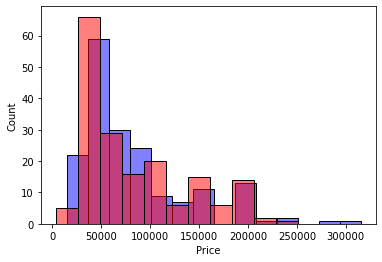

In [109]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [110]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  11479.561506445656
Mean Squared Error:  375438873.40095735
Root Mean Squared Error:  19376.245080018918


***Random Forest Regressor:***

In [111]:
from sklearn.ensemble import RandomForestRegressor
Regressor_RB = RandomForestRegressor()
Regressor_RB.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [112]:
y_test_pred = Regressor_RB.predict(X_test_transformed)

In [113]:
df_values = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

df_values.head()

,Actual,Predicted
59,32990.0,35802.576667
60,85990.0,85990.000000
214,67990.0,79888.700000
637,85990.0,85990.000000
8,46990.0,46386.200000


<AxesSubplot:xlabel='Price', ylabel='Count'>

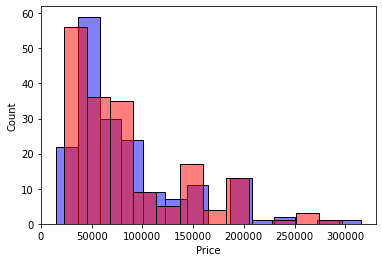

In [114]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [115]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  8564.49675893401
Mean Squared Error:  267437861.87031224
Root Mean Squared Error:  16353.527505413389


***SVR:***

In [116]:
from sklearn.svm import SVR
Regressor_SVM = SVR()
Regressor_SVM.fit(X_train_transformed, y_train)

SVR()

In [117]:
y_test_prediction=Regressor_SVM.predict(X_test_transformed)

In [118]:
df_values = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_prediction})

df_values.head()

,Actual,Predicted
59,32990.0,56947.813514
60,85990.0,57057.114796
214,67990.0,57012.213726
637,85990.0,57057.114796
8,46990.0,56956.851645


<AxesSubplot:xlabel='Price', ylabel='Count'>

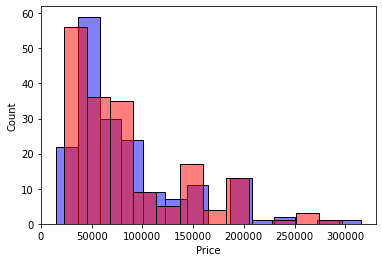

In [119]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test, color='blue', alpha=0.5)

In [120]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_prediction))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_prediction))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction)))

Mean Absolute Error:  40574.831214545935
Mean Squared Error:  3811164593.2832046
Root Mean Squared Error:  61734.630421532485


***Decision Tree Regressor:***

In [121]:
from sklearn.tree import DecisionTreeRegressor
regressor_DT=DecisionTreeRegressor()
regressor_DT.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [122]:
test_predict=regressor_DT.predict(X_test_transformed)

In [123]:
values = pd.DataFrame({'Actual': y_test, 'Predicted': test_predict})

values.head()

,Actual,Predicted
59,32990.0,34990.0
60,85990.0,85990.0
214,67990.0,85990.0
637,85990.0,85990.0
8,46990.0,46990.0


<AxesSubplot:xlabel='Price', ylabel='Count'>

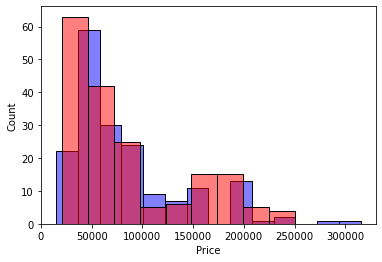

In [124]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(test_predict, color='red', alpha=0.5)

In [125]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, test_predict))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, test_predict))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, test_predict)))

Mean Absolute Error:  10735.325
Mean Squared Error:  558432287.1736112
Root Mean Squared Error:  23631.171938217773


***Logistic Regression:***

In [126]:
from sklearn.linear_model import LogisticRegression
regressor_Logistic = LogisticRegression(random_state = 0)
regressor_Logistic.fit(X_train_transformed, y_train)

LogisticRegression(random_state=0)

In [127]:
test_predict=regressor_Logistic.predict(X_test_transformed)

In [128]:
values = pd.DataFrame({'Actual': y_test, 'Predicted': test_predict})

values.head()

,Actual,Predicted
59,32990.0,39990.0
60,85990.0,85990.0
214,67990.0,85990.0
637,85990.0,85990.0
8,46990.0,46990.0


<AxesSubplot:xlabel='Price', ylabel='Count'>

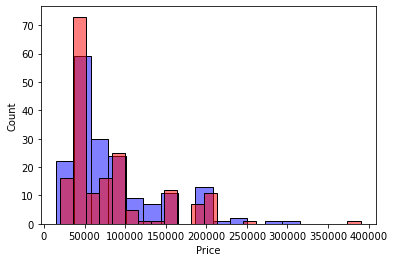

In [129]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(test_predict, color='red', alpha=0.5)

In [130]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, test_predict))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, test_predict))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, test_predict)))

Mean Absolute Error:  12632.216666666667
Mean Squared Error:  753777105.2166667
Root Mean Squared Error:  27455.001460875334


While Comparing all the above models Random Forest Regressor has best RMSE value that fits the price prediction
later on linear regression,Decision Tree regressor,logistic regressor atlast SVR has bad RMSE value. 

In [1]:
import sklearn
sklearn.__version__

'1.1.3'

**Saving models and algorithms for streamlit price prediction:**

In [131]:
from pickle import dump

In [132]:
dump(regressor_Linear,open(r"C:\Users\mythi\Downloads\Streamlit laptop\linear_reg.pkl","wb"))
dump(Regressor_SVM,open(r"C:\Users\mythi\Downloads\Streamlit laptop\SVM.pkl","wb"))
dump(regressor_DT,open(r"C:\Users\mythi\Downloads\Streamlit laptop\DT.pkl","wb"))
dump(Regressor_RB,open(r"C:\Users\mythi\Downloads\Streamlit laptop\RB.pkl","wb"))
dump(regressor_Logistic,open(r"C:\Users\mythi\Downloads\Streamlit laptop\Logistic.pkl","wb"))
dump(scaler,open(r"C:\Users\mythi\Downloads\Streamlit laptop\scaler.pkl","wb"))
dump(encoder_,open(r"C:\Users\mythi\Downloads\Streamlit laptop\Encoder.pkl","wb"))
